<h1><font color='blue'> 8E and 8F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [0]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.svm import SVC
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


In [0]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
clf = SVC(gamma=0.001, C=100)
clf.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
def K(x, x_q, gamma):
  distance = np.linalg.norm(x - x_q) ** 2
  return np.exp(- gamma * distance)

def decision_function(x_cv, x_train, sv_indices, coef, intercept, gamma):
  decision_weights = []
  for x_q in x_cv:
    z = 0
    # for i, j in zip(sv_indices, range(len(coef))): #edited this out because sv_indices and coef length is same
    for index, value in enumerate(sv_indices):
      z += coef[index] * K(x_train[value], x_q, gamma)
    value = z + intercept
    decision_weights.append(float(value))
  return np.array(decision_weights)

sv_indices = clf.support_
coef = clf.dual_coef_.reshape(-1, 1)
intercept = clf.intercept_
gamma = clf.gamma

In [0]:
# Returns True if two arrays are element-wise equal within a tolerance.
np.allclose(decision_function(X_cv, X_train, sv_indices, coef, intercept, gamma), clf.decision_function(X_cv))

True

<h2><font color='Geen'> F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


In [0]:
Np, Nn = 0, 0
for target in y_cv:
  if target == 0:
    Np += 1
  else:
    Nn += 1

ypos = round((Np + 1)/(Np + 2), 8)
yneg = round(1 / (Nn + 2), 8)

print("positive examples : {0} \nnegative examples : {1}".format(Np, Nn))
print("\nPlatt Callibrated positive target : {0}   \nPlatt Callibrated negative target : {1}".format(ypos, yneg))

positive examples : 714 
negative examples : 286

Platt Callibrated positive target : 0.99860335   
Platt Callibrated negative target : 0.00347222


In [0]:
platt_scaled_y_cv = np.array([yneg if target==0 else ypos for target in y_cv])
platt_scaled_y_cv[:5]

array([0.00347222, 0.00347222, 0.00347222, 0.99860335, 0.99860335])

## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity of the assignment we are including the hyerparameter tuning part, but intrested students can try that__


If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm


In [0]:
def sigmoid(w,x,b):
    return 1/(1+np.exp(-(np.dot(x,w)+b)))

In [0]:
def reg_cost(y,pred,alpha,N):
  return(-y * np.log(pred) -(1-y) * np.log(1-pred)).mean() + (alpha/(2*N)) * np.sum(N**2)

In [0]:
def compute_log_loss(true,pred):
    loss = 0
    for true, pred in zip(true,pred):
        loss += (true * np.log(pred)) + ((1-true) * np.log(1-pred))
    return -1*(loss)/len(true)

In [0]:
svmrbf = clf.decision_function(X_cv)
X_train = svmrbf
y_train = platt_scaled_y_cv

In [0]:
from tqdm import tqdm
train_loss = []
# test_loss = []
print("epoch\t log loss")

w = np.zeros_like(X_train[0])
b = 0
eta0  = 0.0001
alpha = 0.0001
N = len(X_train)

for epoch in range(30):
    for j in range(N):
        r = np.random.randint(N)
        Xn = X_train[r]
        yn = y_train[r]

        weight_update = ( 1- (alpha*eta0)/N) *w + (alpha*(Xn*(yn-sigmoid(w,Xn,b))))
        intercept_update = (1 - (alpha*eta0)/N) *b + (alpha*(yn-sigmoid(w,Xn,b)))
        
        w = weight_update
        b = intercept_update
    
    # y_train_pred = map(lambda i: sigmoid(w,i,b), X_train)
    y_train_pred = sigmoid(w,X_train,b)
    # y_train_pred = [i for i in map(lambda i: sigmoid(w,i,b), X_train)]
    # y_test_pred = map(lambda i: sigmoid(w,i,b), X_test)
    # print(y_train_pred, y_test_pred)
    # loss = compute_log_loss(y_train,y_train_pred)
    loss = reg_cost(y_train, y_train_pred, alpha, N)
    
    train_loss.append(loss)
    
    print(epoch,'\t',loss)

epoch	 log loss
0 	 0.648641058734492
1 	 0.5796761151982028
2 	 0.527141351882481
3 	 0.48670791601570557
4 	 0.455873671995446
5 	 0.430939336471167
6 	 0.4097124751721089
7 	 0.392063309197011
8 	 0.37773697139374757
9 	 0.36577624493226857
10 	 0.3555205457254072
11 	 0.34609859502364737
12 	 0.3385354004717094
13 	 0.3319281027034656
14 	 0.32568497952638614
15 	 0.3206763420035529
16 	 0.31532928566413015
17 	 0.31086352367536974
18 	 0.3072022642420477
19 	 0.30345680127099706
20 	 0.30059266207467894
21 	 0.29746507064475836
22 	 0.29427999704919083
23 	 0.29161706541432064
24 	 0.2893653514641676
25 	 0.28738234021450926
26 	 0.2853683135933077
27 	 0.2835310269828128
28 	 0.28160921334535677
29 	 0.2801772393612103


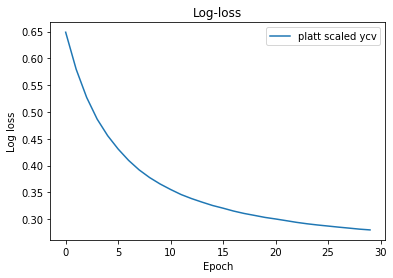

In [0]:
%matplotlib inline
plt.plot(train_loss, label = 'platt scaled ycv')
plt.title("Log-loss")
plt.xlabel("Epoch")
plt.ylabel("Log loss")
plt.legend()
plt.show();

### **Platt probability scores for Optimal w and b**

In [0]:
sigmoid(w, svmrbf, b)[:5]

array([0.0439985 , 0.18208117, 0.09107683, 0.85066219, 0.80443747])